In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/tested.csv')

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [ ]:
dataset.dropna(how = 'all', inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
dataset_Age_median = dataset.groupby(['Sex', 'Pclass'])['Age'].median().reset_index()
dataset_Age_median

,Sex,Pclass,Age
0,female,1,41.0
1,female,2,24.0
2,female,3,22.0
3,male,1,42.0
4,male,2,28.0
5,male,3,24.0


In [ ]:
def impute_age(row):
    condition = (
        (dataset_Age_median['Sex'] == row['Sex']) &(dataset_Age_median['Pclass'] == row['Pclass'])
    )

    if condition.any():
        return dataset_Age_median[condition]['Age'].values[0]
    else:
        return None

In [ ]:
dataset['Age'] = dataset.apply(lambda row: impute_age(row) if pd.isnull(row['Age']) else row['Age'], axis=1)

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [ ]:
dataset.dropna(subset = ['Fare'], inplace = True)

In [ ]:
class_Cabin_mapping = dataset.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))

dataset['Cabin'] = class_Cabin_mapping

In [ ]:
dataset['Cabin_Deck'] = dataset['Cabin'].str[0]
dataset['Has_Cabin'] = dataset['Cabin'].notna().astype(int)
dataset.drop(columns=['Cabin'], inplace = True)

In [ ]:
dataset.fillna(value={'Embarked': dataset['Embarked'].mode()[0]}, inplace= True)

In [ ]:
condition = (dataset['Survived'] == 1)


In [ ]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer

In [ ]:
def k_bins_discretizer(df, columns, n_bins, encode, strategy):
    dis = KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy)
    for col in columns:
        dataset[col] = dis.fit_transform(dataset[[col]])
        dataset = dataset.astype({col: 'int'})
    return dataset
    dataset = k_bins_discretizer(dataset, columns=['Age', 'Fare'], n_bins=5, encode='ordinal', strategy='uniform')

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,F,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,F,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,F,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,F,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,F,1


In [ ]:
def one_hot(dataset, columns):
    return pd.get_dummies(dataset, columns=columns, dtype='int')

In [ ]:
dataset = one_hot(dataset, columns=['Sex'])

In [ ]:
def labelencoder(dataset, columns):
    le = LabelEncoder()
    for col in columns:
        dataset[col] = le.fit_transform(dataset[col])
    return dataset

In [ ]:
dataset = labelencoder(dataset, columns=['Cabin_Deck'])

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,5,1,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,5,1,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,5,1,0,1
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,5,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,5,1,1,0


In [ ]:
def change_data_type(dataset):
    dataset = dataset.astype({'Pclass' : 'int', 'Survived' : 'int', 'Age': 'int', 'SibSp' :'int', 'Parch': 'int', 'Fare': 'int'})
    return dataset

In [ ]:
change_data_type(dataset)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",34,0,0,330911,7,Q,5,1,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7,S,5,1,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9,Q,5,1,0,1
3,895,0,3,"Wirz, Mr. Albert",27,0,0,315154,8,S,5,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12,S,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",24,0,0,A.5. 3236,8,S,5,1,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108,C,2,1,1,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7,S,5,1,0,1
416,1308,0,3,"Ware, Mr. Frederick",24,0,0,359309,8,S,5,1,0,1


In [ ]:
dataset['Embarked'] = dataset['Embarked'].astype('category')

In [ ]:
dataset[['last_Name', 'title', 'first_Name', ]] = dataset['Name'].str.split(', |\.', expand=True)
dataset.drop(columns=['Name'], inplace = True)
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male,last_Name,title,first_Name
0,892,0,3,34.5,0,0,330911,7.8292,Q,5,1,0,1,Kelly,Mr,James
1,893,1,3,47.0,1,0,363272,7.0000,S,5,1,1,0,Wilkes,Mrs,James (Ellen Needs)
2,894,0,2,62.0,0,0,240276,9.6875,Q,5,1,0,1,Myles,Mr,Thomas Francis
3,895,0,3,27.0,0,0,315154,8.6625,S,5,1,0,1,Wirz,Mr,Albert
4,896,1,3,22.0,1,1,3101298,12.2875,S,5,1,1,0,Hirvonen,Mrs,Alexander (Helga E Lindqvist)


In [ ]:
dataset = dataset[['title', 'last_Name', 'first_Name', 'Pclass', 'Survived', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
                 'Cabin_Deck', 'Has_Cabin']]

In [ ]:
dataset.head()

,title,last_Name,first_Name,Pclass,Survived,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin
0,Mr,Kelly,James,3,0,0,1,34.5,0,0,7.8292,Q,5,1
1,Mrs,Wilkes,James (Ellen Needs),3,1,1,0,47.0,1,0,7.0000,S,5,1
2,Mr,Myles,Thomas Francis,2,0,0,1,62.0,0,0,9.6875,Q,5,1
3,Mr,Wirz,Albert,3,0,0,1,27.0,0,0,8.6625,S,5,1
4,Mrs,Hirvonen,Alexander (Helga E Lindqvist),3,1,1,0,22.0,1,1,12.2875,S,5,1


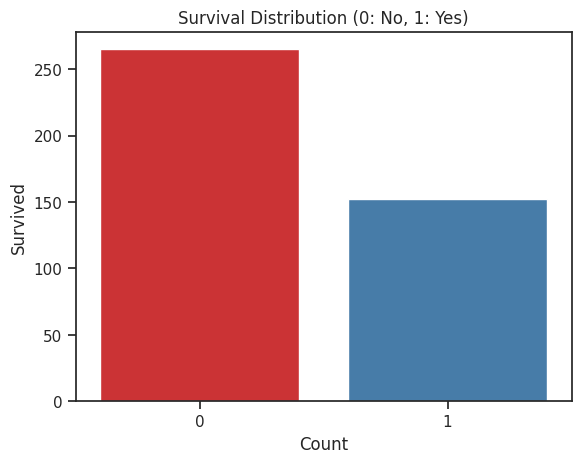

In [ ]:
sns.set(style="ticks")
sns.countplot(x = 'Survived', data = dataset, palette = 'Set1')
plt.title("Survival Distribution (0: No, 1: Yes)")
plt.ylabel("Survived")
plt.xlabel("Count")
plt.show()

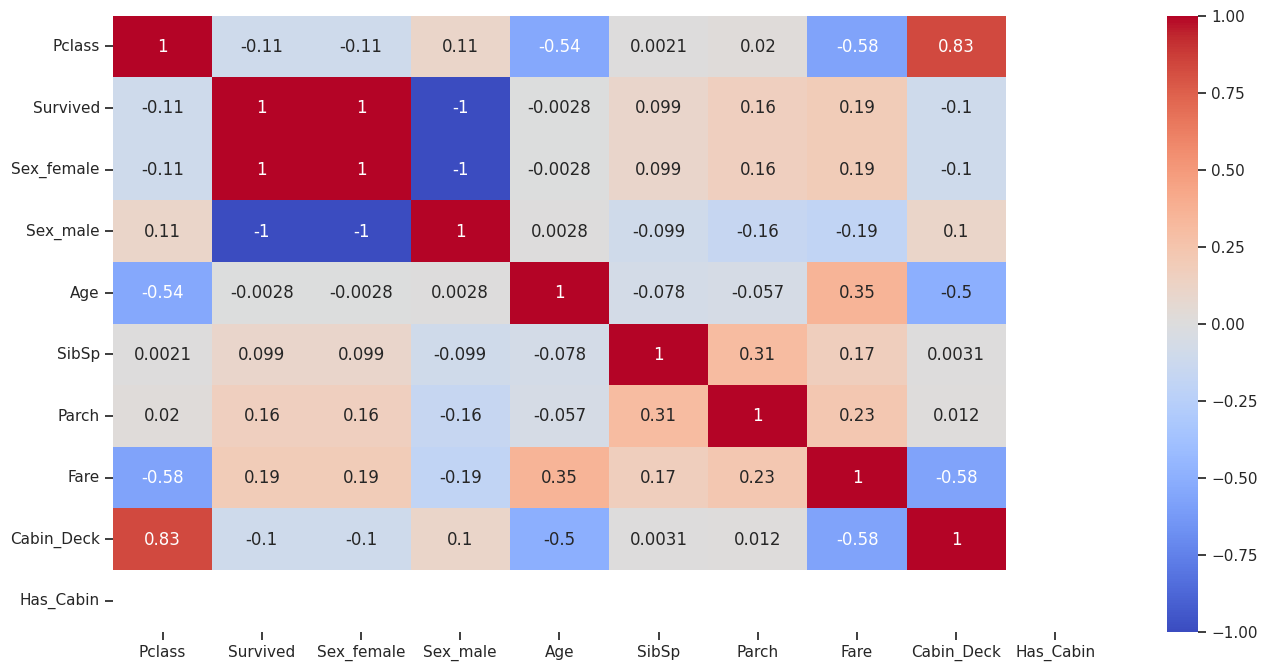

In [ ]:
corr_dataset = dataset[['Pclass','Survived', 'Sex_female', 'Sex_male', 'Age', 'SibSp','Parch', 'Fare','Cabin_Deck', 'Has_Cabin']].corr()
plt.figure(figsize = (16, 8))
sns.heatmap(data = corr_dataset, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
dataset.to_csv('final_preprocessed.csv', index = False)